In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

import h5py
from tqdm import tqdm_notebook

%matplotlib inline

%run ../src/count_matrix_metrics.py
%run ../src/utils.py

## Slide-seq

In [2]:
adata = load_slide_seq(data_path="../data/slide_seq_ob/")
adata = adata[(adata.obs["x"].values > 500) & (adata.obs["x"].values < 5000) & (adata.obs["y"].values > 800)]

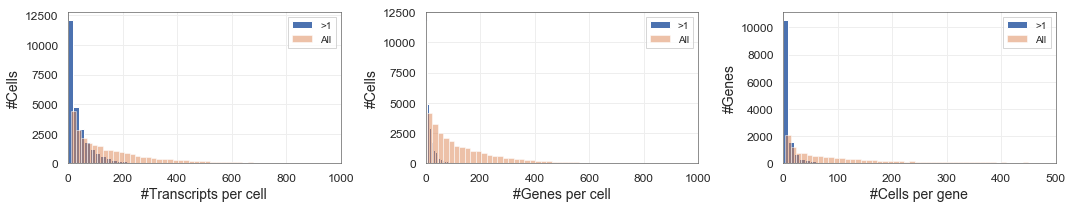

In [3]:
plot_expression_metrics(adata.X, xlim1=1000, xlim2=1000, xlim3=500);

In [4]:
get_expression_value_fracs(adata.X)

1       88.584%
2        8.478%
3        1.603%
4        0.522%
5        0.235%
6        0.125%
7        0.083%
8        0.058%
9        0.044%
>=10     0.269%
dtype: object

In [5]:
get_scalar_metrics(adata.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,26172,14359,4464684.0,0.990205


#### Visualize

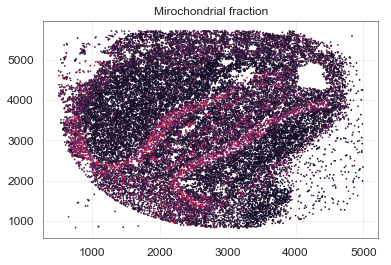

In [6]:
plt.scatter(adata.obs.x, adata.obs.y, c=adata.obs.mit_frac, s=0.5);
plt.title("Mirochondrial fraction");

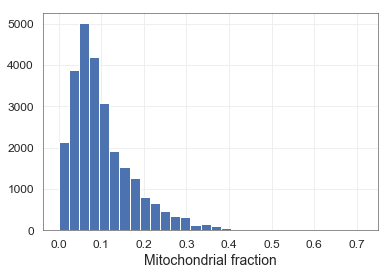

In [7]:
adata.obs.mit_frac.hist(bins=30);
plt.xlabel("Mitochondrial fraction");

In [8]:
%time adata_processed = process_scanpy(adata, cl_resolution=0.3, n_neighbors=10)

CPU times: user 5min 57s, sys: 1min, total: 6min 58s
Wall time: 1min 4s


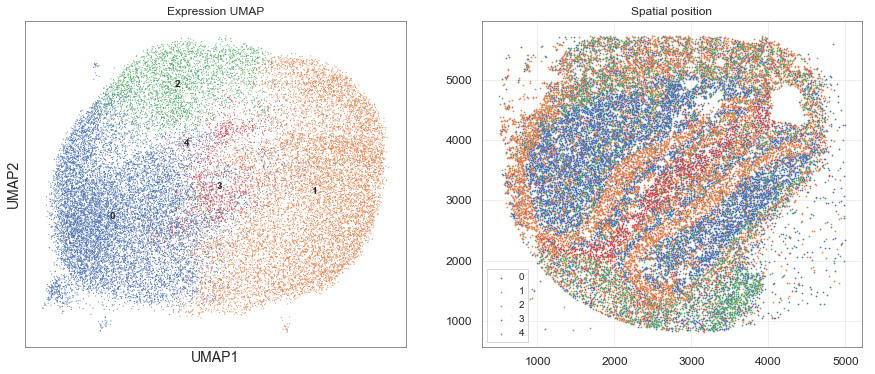

In [9]:
plot_clusters_spatial(adata_processed, titles=["Expression UMAP", "Spatial position"])

### Merge

In [10]:
adata_collapsed = merge_slide_seq_beads(adata, grid_size=101)

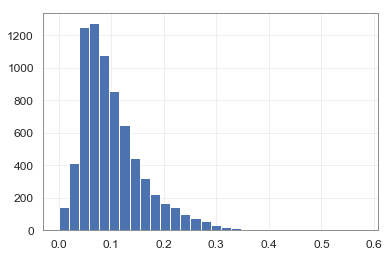

In [11]:
adata_collapsed.obs.mit_frac.hist(bins=30);

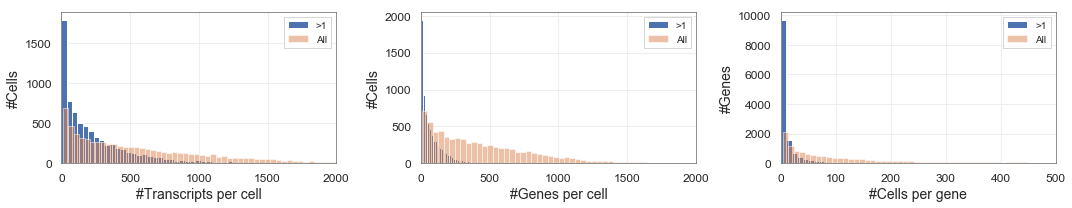

In [12]:
plot_expression_metrics(adata_collapsed.X, xlim1=2000, xlim2=2000, xlim3=500);

In [13]:
get_expression_value_fracs(adata_collapsed.X)

1       81.783%
2       12.109%
3        3.166%
4        1.205%
5        0.586%
6        0.325%
7         0.19%
8        0.126%
9        0.089%
>=10     0.421%
dtype: object

In [14]:
get_scalar_metrics(adata_collapsed.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,7308,14359,4464650.0,0.969458


#### Visualize

In [15]:
%time adata_collapsed_processed = process_scanpy(adata_collapsed, cl_resolution=0.4)

CPU times: user 2min 27s, sys: 16.3 s, total: 2min 43s
Wall time: 27.1 s


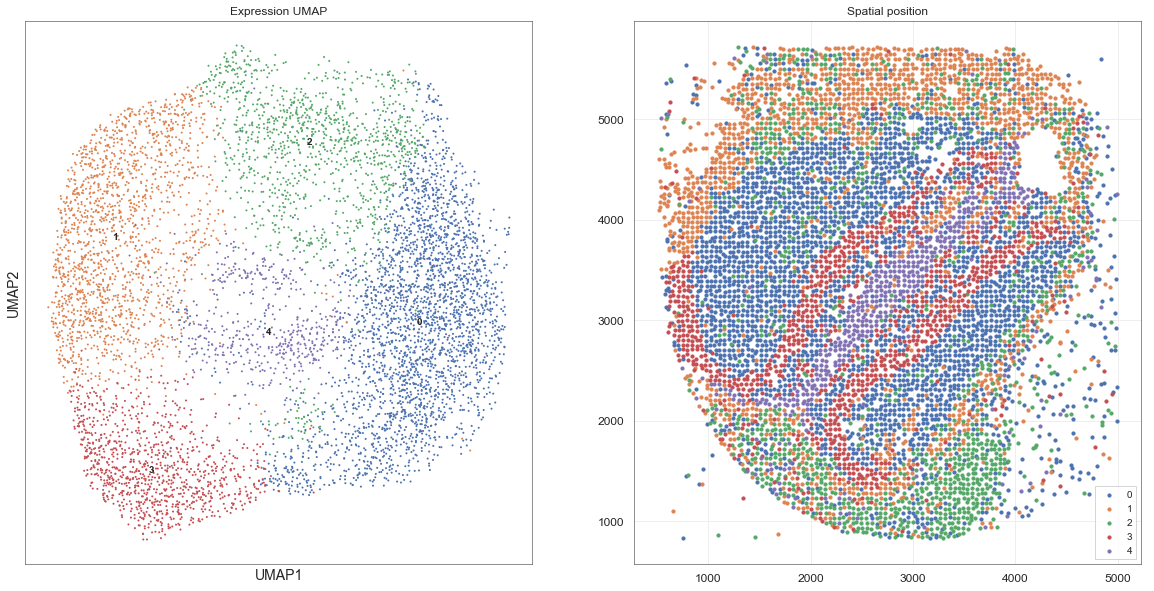

In [16]:
plot_clusters_spatial(adata_collapsed_processed, s=10, figsize=(20, 10), titles=["Expression UMAP", "Spatial position"])

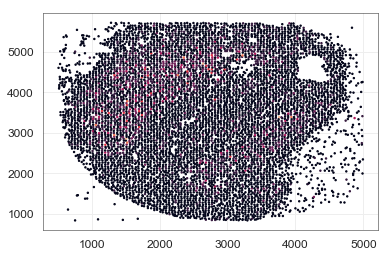

In [17]:
plt.scatter(adata_collapsed.obs.x, adata_collapsed.obs.y, c=adata_collapsed[:,"Pbx1"].X, s=2);
# plt.title("Mirochondrial fraction");

### Merge hard

In [18]:
adata_collapsed_hard = merge_slide_seq_beads(adata, grid_size=20)

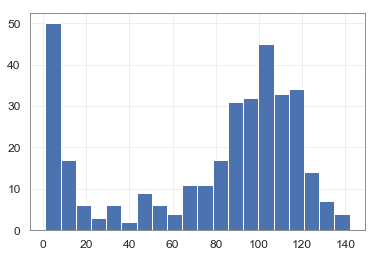

In [19]:
adata_collapsed_hard.obs["n_merged"].hist(bins=20);

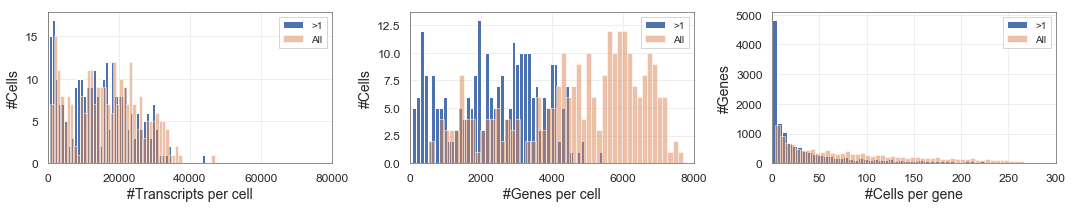

In [20]:
adata_collapsed_hard = adata_collapsed_hard[adata_collapsed_hard.obs["n_merged"].values > 25,:]
plot_expression_metrics(adata_collapsed_hard.X, xlim1=80000, xlim2=8000, xlim3=300);

In [21]:
get_expression_value_fracs(adata_collapsed_hard.X)

1       49.043%
2       19.865%
3        9.945%
4        5.631%
5        3.524%
6        2.379%
7        1.682%
8        1.252%
9         0.97%
>=10     5.709%
dtype: object

In [22]:
get_scalar_metrics(adata_collapsed_hard.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,267,14359,4426131.0,0.672184


#### Visualization

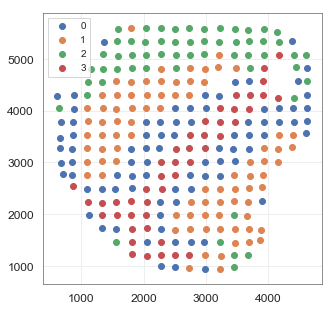

In [23]:
fig = plt.figure(figsize=(5, 5))
adata_collapsed_hard_processed = process_scanpy(adata_collapsed_hard, n_neighbors=10, do_log=True, n_od_genes=1000)
plot_clustering(adata_collapsed_hard_processed)

## SpatialTranscriptomics

In [24]:
adata_st = load_spatial_transcriptomics("../data/spatial_transcriptomics_ob/Rep1_MOB_count_matrix-1.tsv")

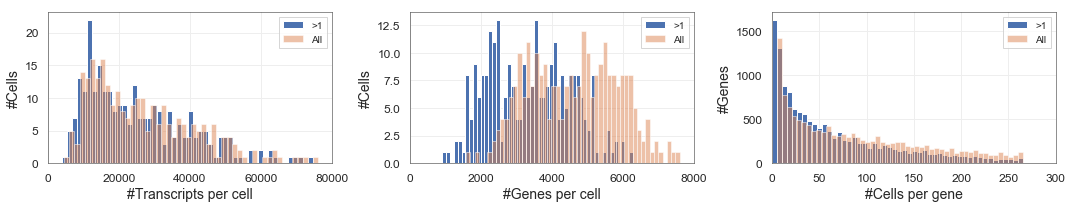

In [25]:
plot_expression_metrics(adata_st.X, xlim1=80000, xlim2=8000, xlim3=300, figsize=(15, 3));

In [26]:
get_expression_value_fracs(adata_st.X)

1       27.192%
2       15.896%
3       12.146%
4        9.096%
5          6.8%
6        5.121%
7        3.916%
8        3.042%
9        2.404%
>=10    14.386%
dtype: object

In [27]:
get_scalar_metrics(adata_st.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,265,13732,7112116.0,0.663793


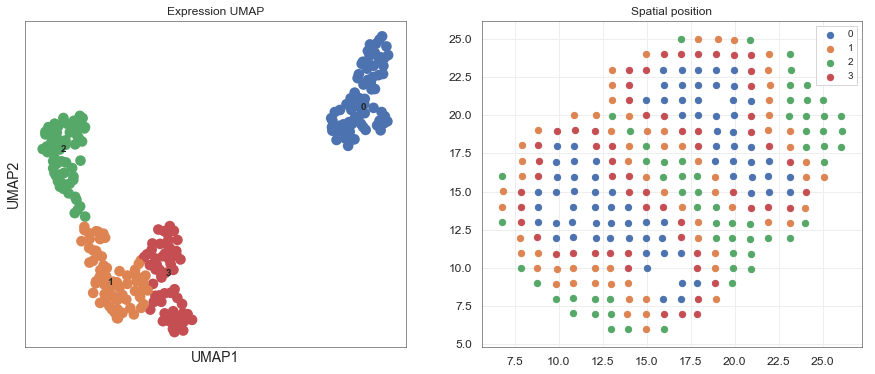

In [28]:
adata_st_processed = process_scanpy(adata_st, n_neighbors=10, do_log=True, n_od_genes=1000)
plot_clusters_spatial(adata_st_processed, s=40, titles=["Expression UMAP", "Spatial position"])